In [9]:
###################################################
# Profile Mask Visualizer
###################################################

from cgmbrush.cgmbrush import *
import matplotlib.colors as colors


cellsize (Mpc): 0.04359654017857143
0.73
comoving radius: 0.56165108369923
0.00014237149903218357


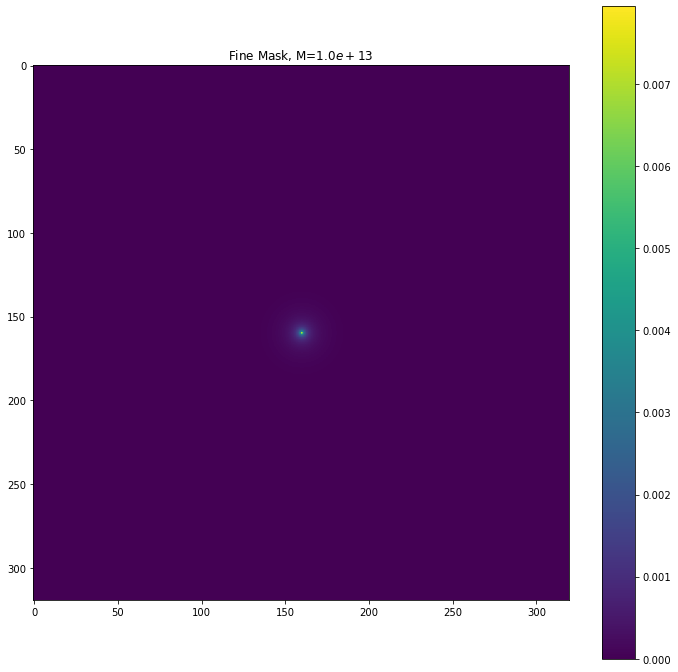

In [10]:
profile = FireProfile() # Choose a profile

# pick some parameters
mass = 1E13 # solar masses
redshift = 0 
resolution = 8
cellsize = L/(1024 * resolution)
print("cellsize (Mpc): %s" % cellsize)
fine_mask_len = 20 * resolution
comoving_radius = (1+redshift)*(mass**(1/3) / Rvir_den(redshift)) # what are the units...
print(q(0))
print("comoving radius: %s" % comoving_radius)

mask = profile.get_mask(mass, comoving_radius, redshift, resolution, 1, cellsize, fine_mask_len)
fig, ax = plt.subplots(1,1,figsize=(12, 12))
pos = ax.imshow(mask)#, norm=colors.LogNorm(vmin=1E-1, vmax=mask.max()))
ax.title.set_text('Fine Mask, M=${:.1e}$'.format(mass))
fig.colorbar(pos, ax=ax)

In [11]:
from cgmbrush import *
def compareRadii(mass, z):
    print("Mass {:.1e}, redshift {}".format(mass, z))
    a = comoving_radius_for_halo(mass, z)
    b = r200Mz(mass, z)
    print(' rVir:\t{:.4f}'.format(a))
    print(' r200:\t{:.4f}'.format(b))
    print(' difference:\t{:.1f}%'.format((abs(b-a)) * 100 / b))

masses = [1E10,1E13,1E15]
redshifts = [0,0.5,1,2]

for z in redshifts:
    for m in masses:
        compareRadii(m, z)

Mass 1.0e+10, redshift 0
 rVir:	0.0562
 r200:	0.0688
 difference:	18.3%
Mass 1.0e+13, redshift 0
 rVir:	0.5617
 r200:	0.6876
 difference:	18.3%
Mass 1.0e+15, redshift 0
 rVir:	2.6070
 r200:	3.1915
 difference:	18.3%
Mass 1.0e+10, redshift 0.5
 rVir:	0.0642
 r200:	0.0688
 difference:	6.6%
Mass 1.0e+13, redshift 0.5
 rVir:	0.6422
 r200:	0.6876
 difference:	6.6%
Mass 1.0e+15, redshift 0.5
 rVir:	2.9807
 r200:	3.1915
 difference:	6.6%
Mass 1.0e+10, redshift 1
 rVir:	0.0675
 r200:	0.0688
 difference:	1.8%
Mass 1.0e+13, redshift 1
 rVir:	0.6754
 r200:	0.6876
 difference:	1.8%
Mass 1.0e+15, redshift 1
 rVir:	3.1348
 r200:	3.1915
 difference:	1.8%
Mass 1.0e+10, redshift 2
 rVir:	0.0698
 r200:	0.0688
 difference:	1.6%
Mass 1.0e+13, redshift 2
 rVir:	0.6984
 r200:	0.6876
 difference:	1.6%
Mass 1.0e+15, redshift 2
 rVir:	3.2417
 r200:	3.1915
 difference:	1.6%


In [12]:
p = BolshoiProvider()
old = Configuration(FireProfile(), 1, provider = p, resolution=8)
old.datestamp = '2021-11-01' 
#old.datestamp = '2021-11-16' # re ran it the old way today

new = Configuration(FireProfile(), 1, provider = p, resolution=8)
new.datestamp = '2021-11-08'

vmin = 0
vmax = 500
fig, axs = fields_comparison_plot([('FIRE - Calculate Interp', NEW), ('FIRE - Old Read Interp', OLD)], vmin, vmax)


NameError: name 'fields_comparison_plot' is not defined